# Лаборатоная работа №1

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [189]:
df = pd.read_csv("lab01.csv", index_col=0)
df

,x1,x2,x3,x4,x5,target
0,осень,6.0,10.0,684.853714,489.727534,127000.0
1,лето,6.0,5.0,787.439842,129.226659,54200.0
2,лето,7.0,8.0,934.334854,996.189811,107600.0
3,зима,7.0,7.0,507.949612,553.560324,91800.0
4,зима,10.0,10.0,154.831480,88.940079,171500.0
...,...,...,...,...,...,...
995,осень,8.0,5.0,827.094070,4.385557,61800.0
996,осень,7.0,6.0,842.487798,164.747387,53800.0
997,осень,10.0,7.0,497.651151,639.352422,122800.0
998,осень,8.0,6.0,282.684179,194.777096,84400.0


### Вариант 1 избавления от категориального признака: LabelEncoder

In [190]:
from sklearn.preprocessing import LabelEncoder

df_le = df.copy()
x1 = df_le.x1
le1 = LabelEncoder()
df_le.x1 = le1.fit_transform(df_le.x1)
df_le

,x1,x2,x3,x4,x5,target
0,3,6.0,10.0,684.853714,489.727534,127000.0
1,2,6.0,5.0,787.439842,129.226659,54200.0
2,2,7.0,8.0,934.334854,996.189811,107600.0
3,1,7.0,7.0,507.949612,553.560324,91800.0
4,1,10.0,10.0,154.831480,88.940079,171500.0
...,...,...,...,...,...,...
995,3,8.0,5.0,827.094070,4.385557,61800.0
996,3,7.0,6.0,842.487798,164.747387,53800.0
997,3,10.0,7.0,497.651151,639.352422,122800.0
998,3,8.0,6.0,282.684179,194.777096,84400.0


### Вариант 2 избавления от категориального признака: OneHotEncoder

In [191]:
from sklearn.preprocessing import OneHotEncoder

df_oe = df.copy()
onehot_encoder = OneHotEncoder(sparse_output=False, categories='auto')
onehot_encoded = onehot_encoder.fit_transform(df_oe[['x1']])
feature_names = onehot_encoder.get_feature_names_out(['x1'])
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=feature_names)
df_oe = pd.concat([df_oe, onehot_encoded_df], axis=1)
df_oe

,x1,x2,x3,x4,x5,target,x1_весна,x1_зима,x1_лето,x1_осень
0,осень,6.0,10.0,684.853714,489.727534,127000.0,0.0,0.0,0.0,1.0
1,лето,6.0,5.0,787.439842,129.226659,54200.0,0.0,0.0,1.0,0.0
2,лето,7.0,8.0,934.334854,996.189811,107600.0,0.0,0.0,1.0,0.0
3,зима,7.0,7.0,507.949612,553.560324,91800.0,0.0,1.0,0.0,0.0
4,зима,10.0,10.0,154.831480,88.940079,171500.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
995,осень,8.0,5.0,827.094070,4.385557,61800.0,0.0,0.0,0.0,1.0
996,осень,7.0,6.0,842.487798,164.747387,53800.0,0.0,0.0,0.0,1.0
997,осень,10.0,7.0,497.651151,639.352422,122800.0,0.0,0.0,0.0,1.0
998,осень,8.0,6.0,282.684179,194.777096,84400.0,0.0,0.0,0.0,1.0


## Графики зависимости целевой переменной от каждой

### x1: OneHotEncoder

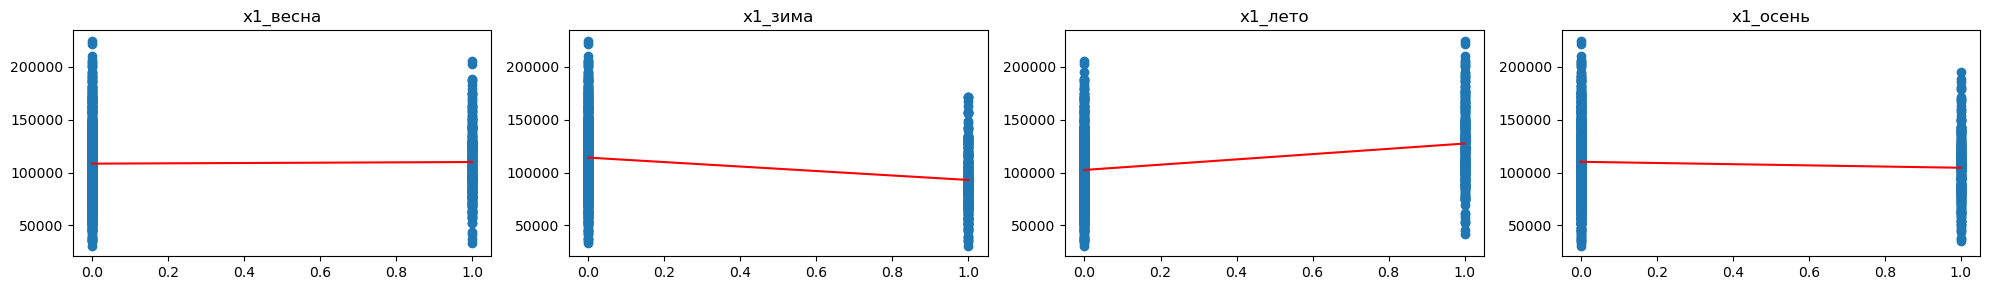

In [192]:
column_names = ["x1_весна", "x1_зима", "x1_лето", "x1_осень"]
plt.figure(figsize=(20, 3))
for i in range(len(column_names)):
    plt.subplot(1, len(column_names), i + 1)
    plt.plot(df_oe[column_names[i]], df_oe.target, "o")
    dfgr = df_oe[[column_names[i], "target"]].groupby(by=column_names[i]).mean().reset_index()
    plt.plot(dfgr[column_names[i]], dfgr.target, "r-")
    plt.title(column_names[i])
plt.tight_layout()
plt.show()    

### x1: LabelEncoder

Text(0, 0.5, 'target')

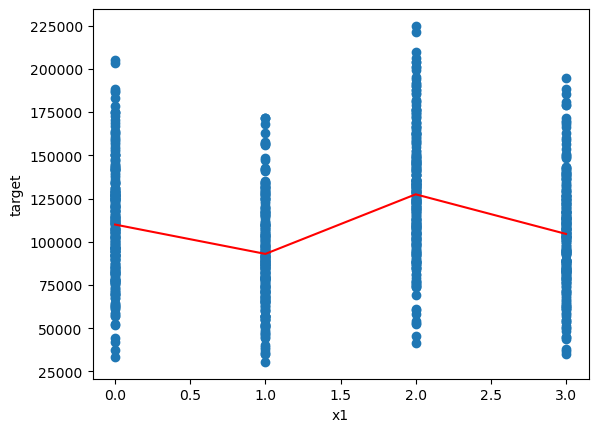

In [193]:
df_oe["x1"] = df_le["x1"]
df_le = df_oe
dfgr_1 = df_le[["x1", "target"]].groupby(by="x1").mean().reset_index()
plt.plot(df_le.x1, df_le.target, "o")
plt.plot(dfgr_1.x1, dfgr_1.target, "r-")
plt.xlabel("x1")
plt.ylabel("target")

#### поскольку переменная x1 целочисленная, можно заменить каждое значение на матическое ожидание

In [194]:
df_le = df_le.merge(dfgr_1, on="x1")
df_le.rename({"target_x":"target", "target_y":"x1_new"}, inplace=True, axis=1)
df_le.corr()

,x1,x2,x3,x4,x5,target,x1_весна,x1_зима,x1_лето,x1_осень,x1_new
x1,1.000000,-0.026037,0.012001,-0.020914,0.015533,0.062321,-0.775767,-0.251992,0.271162,0.768358,0.171315
x2,-0.026037,1.000000,-0.031210,0.030458,0.047308,0.556719,0.030420,-0.010294,-0.004061,-0.016338,0.006629
x3,0.012001,-0.031210,1.000000,0.040714,0.001254,0.522521,-0.009601,0.006544,-0.014959,0.018342,-0.016380
x4,-0.020914,0.030458,0.040714,1.000000,0.010863,-0.297098,0.006076,0.010955,0.013396,-0.030931,0.007441
x5,0.015533,0.047308,0.001254,0.010863,1.000000,0.027597,-0.007399,-0.006646,-0.004274,0.018617,-0.002138
target,0.062321,0.556719,0.522521,-0.297098,0.027597,1.000000,0.019340,-0.267587,0.316556,-0.070209,0.363778
x1_весна,-0.775767,0.030420,-0.009601,0.006076,-0.007399,0.019340,1.000000,-0.337792,-0.339584,-0.327935,0.053163
x1_зима,-0.251992,-0.010294,0.006544,0.010955,-0.006646,-0.267587,-0.337792,1.000000,-0.338686,-0.327067,-0.735577
x1_лето,0.271162,-0.004061,-0.014959,0.013396,-0.004274,0.316556,-0.339584,-0.338686,1.000000,-0.328802,0.870190
x1_осень,0.768358,-0.016338,0.018342,-0.030931,0.018617,-0.070209,-0.327935,-0.327067,-0.328802,1.000000,-0.193000


Text(0, 0.5, 'target')

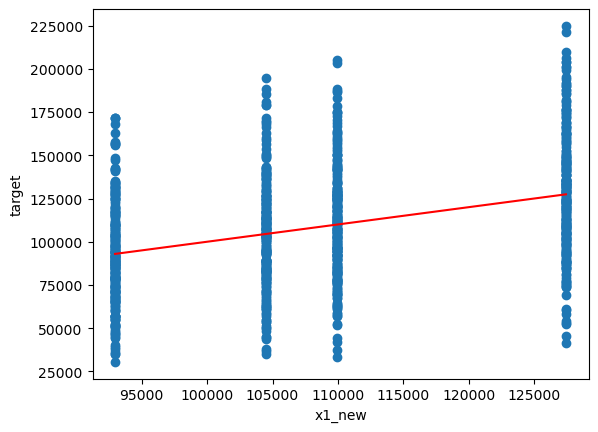

In [195]:
dfgr_1 = df_le[["x1_new", "target"]].groupby(by="x1_new").mean().reset_index()
plt.plot(df_le.x1_new, df_le.target, "o")
plt.plot(dfgr_1.x1_new, dfgr_1.target, "r-")
plt.xlabel("x1_new")
plt.ylabel("target")

In [196]:
df = df_le

### x2

Text(0, 0.5, 'target')

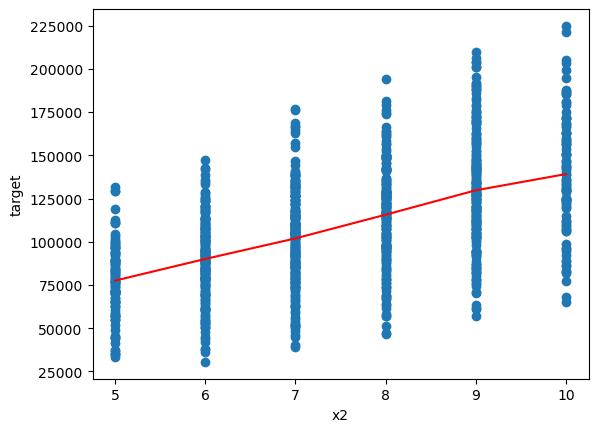

In [197]:
dfgr_2 = df[["x2", "target"]].groupby(by="x2").mean().reset_index()
plt.plot(df.x2, df.target, "o")
plt.plot(dfgr_2.x2, dfgr_2.target, "r-")
plt.xlabel("x2")
plt.ylabel("target")

### x3

Text(0, 0.5, 'target')

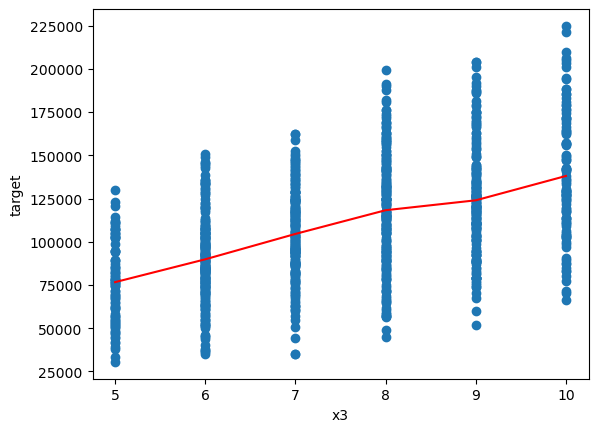

In [198]:
dfgr_3 = df[["x3", "target"]].groupby(by="x3").mean().reset_index()
plt.plot(df.x3, df.target, "o")
plt.plot(dfgr_3.x3, dfgr_3.target, "r-")
plt.xlabel("x3")
plt.ylabel("target")

### x4

Text(0, 0.5, 'target')

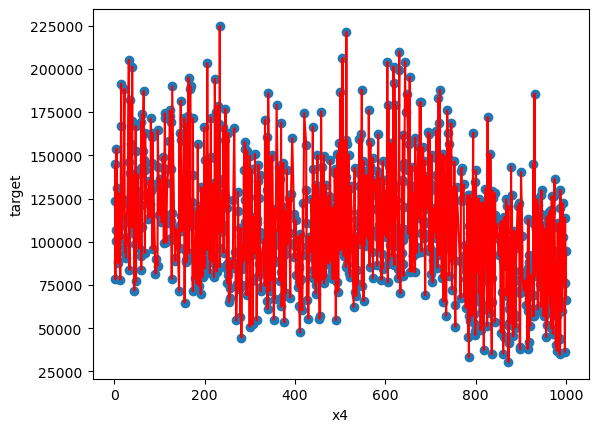

In [199]:
dfgr_4 = df[["x4", "target"]].groupby(by="x4").mean().reset_index()
plt.plot(df.x4, df.target, "o")
plt.plot(dfgr_4.x4, dfgr_4.target, "r-")
plt.xlabel("x4")
plt.ylabel("target")

### x5

Text(0, 0.5, 'target')

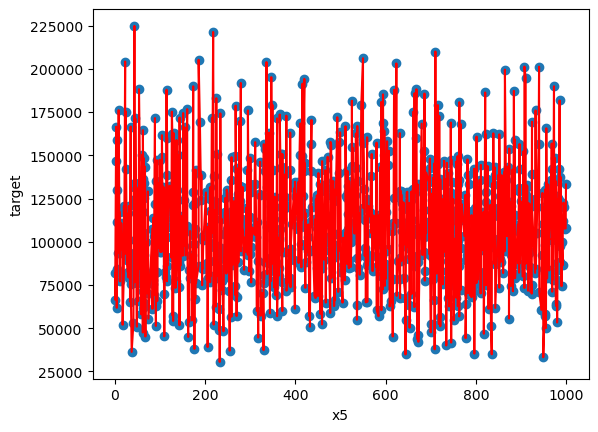

In [200]:
dfgr_5 = df[["x5", "target"]].groupby(by="x5").mean().reset_index()
plt.plot(df.x5, df.target, "o")
plt.plot(dfgr_5.x5, dfgr_5.target, "r-")
plt.xlabel("x5")
plt.ylabel("target")

## Корреляция между переменными

In [201]:
df.corr()

,x1,x2,x3,x4,x5,target,x1_весна,x1_зима,x1_лето,x1_осень,x1_new
x1,1.000000,-0.026037,0.012001,-0.020914,0.015533,0.062321,-0.775767,-0.251992,0.271162,0.768358,0.171315
x2,-0.026037,1.000000,-0.031210,0.030458,0.047308,0.556719,0.030420,-0.010294,-0.004061,-0.016338,0.006629
x3,0.012001,-0.031210,1.000000,0.040714,0.001254,0.522521,-0.009601,0.006544,-0.014959,0.018342,-0.016380
x4,-0.020914,0.030458,0.040714,1.000000,0.010863,-0.297098,0.006076,0.010955,0.013396,-0.030931,0.007441
x5,0.015533,0.047308,0.001254,0.010863,1.000000,0.027597,-0.007399,-0.006646,-0.004274,0.018617,-0.002138
target,0.062321,0.556719,0.522521,-0.297098,0.027597,1.000000,0.019340,-0.267587,0.316556,-0.070209,0.363778
x1_весна,-0.775767,0.030420,-0.009601,0.006076,-0.007399,0.019340,1.000000,-0.337792,-0.339584,-0.327935,0.053163
x1_зима,-0.251992,-0.010294,0.006544,0.010955,-0.006646,-0.267587,-0.337792,1.000000,-0.338686,-0.327067,-0.735577
x1_лето,0.271162,-0.004061,-0.014959,0.013396,-0.004274,0.316556,-0.339584,-0.338686,1.000000,-0.328802,0.870190
x1_осень,0.768358,-0.016338,0.018342,-0.030931,0.018617,-0.070209,-0.327935,-0.327067,-0.328802,1.000000,-0.193000


### Предобработка данных для повышение зависимости
#### Видно, что у целевой переменной низкая зависимость от переменных x4 и x5. Можно выполнить некоторые преобразования этих переменных для повышения точности модели.

#### x4:

In [202]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
#KBinsDiscretizer
est = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='uniform', subsample=None)
Xt = est.fit_transform(df[['x4']])
df['x4_kbin'] = Xt
dfgr_4 = df[["x4_kbin", "target"]].groupby(by="x4_kbin").mean().reset_index()
df = df.merge(dfgr_4, on="x4_kbin")
df.rename({"target_x":"target", "target_y":"x4_new"}, inplace=True, axis=1)


#### x5:

In [203]:
#KBinsDiscretizer
est = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='uniform', subsample=None)
Xt = est.fit_transform(df[['x5']])
df['x5_kbin'] = Xt
dfgr_5 = df[["x5_kbin", "target"]].groupby(by="x5_kbin").mean().reset_index()
df = df.merge(dfgr_5, on="x5_kbin")
df.rename({"target_x":"target", "target_y":"x5_new"}, inplace=True, axis=1)

In [204]:
df.corr()

,x1,x2,x3,x4,x5,target,x1_весна,x1_зима,x1_лето,x1_осень,x1_new,x4_kbin,x4_new,x5_kbin,x5_new
x1,1.000000,-0.026037,0.012001,-0.020914,0.015533,0.062321,-0.775767,-0.251992,0.271162,0.768358,0.171315,-0.023878,0.016585,0.017742,0.062016
x2,-0.026037,1.000000,-0.031210,0.030458,0.047308,0.556719,0.030420,-0.010294,-0.004061,-0.016338,0.006629,0.029865,0.011114,0.046893,0.052378
x3,0.012001,-0.031210,1.000000,0.040714,0.001254,0.522521,-0.009601,0.006544,-0.014959,0.018342,-0.016380,0.041985,-0.027938,0.000169,0.048688
x4,-0.020914,0.030458,0.040714,1.000000,0.010863,-0.297098,0.006076,0.010955,0.013396,-0.030931,0.007441,0.998736,-0.657334,0.011620,-0.055118
x5,0.015533,0.047308,0.001254,0.010863,1.000000,0.027597,-0.007399,-0.006646,-0.004274,0.018617,-0.002138,0.011040,-0.019447,0.998745,0.231696
target,0.062321,0.556719,0.522521,-0.297098,0.027597,1.000000,0.019340,-0.267587,0.316556,-0.070209,0.363778,-0.296749,0.452409,0.026699,0.115915
x1_весна,-0.775767,0.030420,-0.009601,0.006076,-0.007399,0.019340,1.000000,-0.337792,-0.339584,-0.327935,0.053163,0.006248,-0.025949,-0.008059,-0.080977
x1_зима,-0.251992,-0.010294,0.006544,0.010955,-0.006646,-0.267587,-0.337792,1.000000,-0.338686,-0.327067,-0.735577,0.014244,-0.008117,-0.008671,0.007089
x1_лето,0.271162,-0.004061,-0.014959,0.013396,-0.004274,0.316556,-0.339584,-0.338686,1.000000,-0.328802,0.870190,0.013894,0.051549,-0.003902,0.069974
x1_осень,0.768358,-0.016338,0.018342,-0.030931,0.018617,-0.070209,-0.327935,-0.327067,-0.328802,1.000000,-0.193000,-0.034951,-0.017850,0.020965,0.003895


#### Получается, целесообразнее для обучения использовать следующие данные:

In [205]:
#LE
final_df = df.copy()
final_df = final_df[["x1_new", "x2", "x3", "x4_new", "x5_new", "target"]]
final_df.rename({"x1_new":"x1", "x4_new":"x4", "x5_new":"x5"}, inplace=True, axis=1)
final_df

,x1,x2,x3,x4,x5,target
0,104517.842324,6.0,10.0,123162.500000,110139.534884,127000.0
1,127424.015748,6.0,9.0,123162.500000,110139.534884,133600.0
2,127424.015748,6.0,9.0,123162.500000,110139.534884,123600.0
3,109937.154150,8.0,10.0,123162.500000,110139.534884,163300.0
4,104517.842324,6.0,10.0,94131.372549,110139.534884,84700.0
...,...,...,...,...,...,...
995,104517.842324,6.0,5.0,86357.407407,107986.842105,38000.0
996,127424.015748,10.0,6.0,86357.407407,107986.842105,121500.0
997,109937.154150,9.0,6.0,86357.407407,107986.842105,84600.0
998,127424.015748,6.0,6.0,125777.777778,107986.842105,100800.0


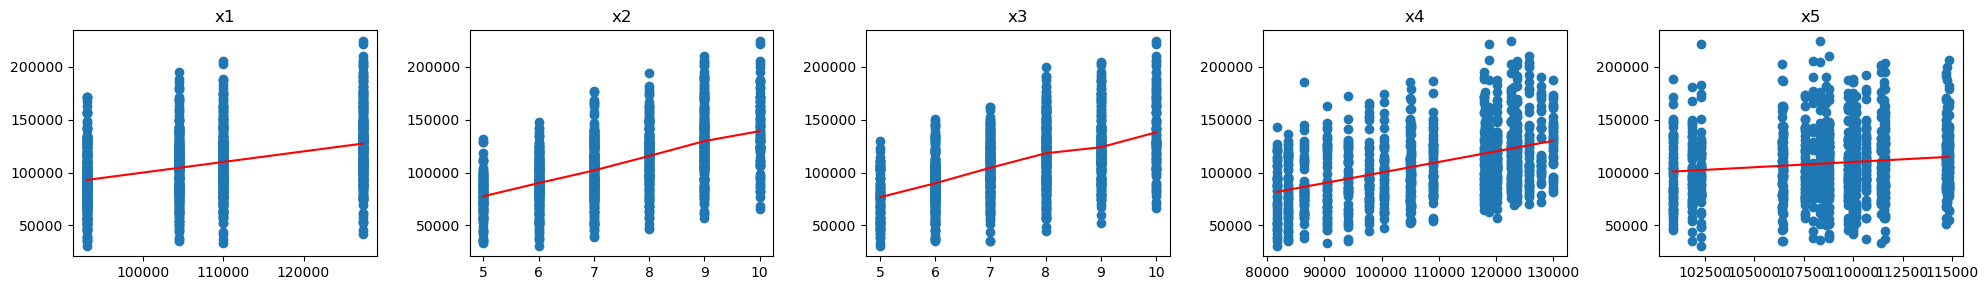

In [206]:
column_names = final_df.columns.tolist()
plt.figure(figsize=(20, 3))
for i in range(len(column_names) - 1):
    plt.subplot(1, len(column_names) - 1, i + 1)
    plt.plot(final_df[column_names[i]], final_df.target, "o")
    dfgr = final_df[[column_names[i], "target"]].groupby(by=column_names[i]).mean().reset_index()
    plt.plot(dfgr[column_names[i]], dfgr.target, "r-")
    plt.title(column_names[i])
plt.tight_layout()
plt.show()    

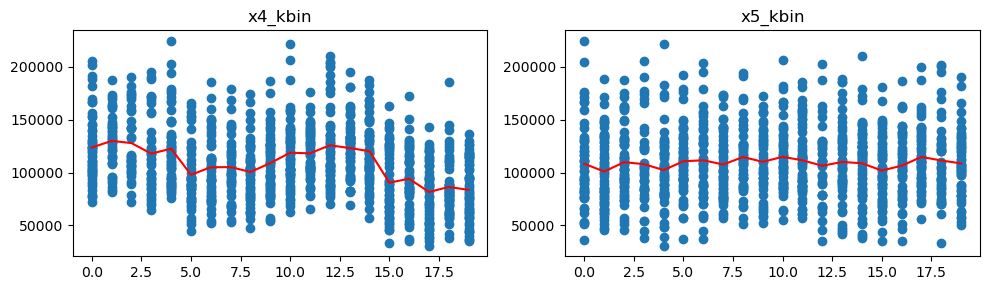

In [207]:
column_names = ["x4_kbin", "x5_kbin"]
plt.figure(figsize=(10, 3))
for i in range(len(column_names)):
    plt.subplot(1, len(column_names), i + 1)
    plt.plot(df[column_names[i]], df.target, "o")
    dfgr = df[[column_names[i], "target"]].groupby(by=column_names[i]).mean().reset_index()
    plt.plot(dfgr[column_names[i]], dfgr.target, "r-")
    plt.title(column_names[i])
plt.tight_layout()
plt.show() 

### Линейная регрессия

In [208]:
#LE
X = final_df[["x1", "x2", "x3", "x4", "x5"]]
y = final_df["target"]


In [209]:
from sklearn import linear_model 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Нормализация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Обучение модели
linreg = linear_model.LinearRegression()
linreg.fit(X_train_scaled, y_train)
# Получение предсказаний
pred_train = linreg.predict(X_train_scaled)
pred_test = linreg.predict(X_test_scaled)
# Получение коэффициентов и свободного члена
coefficients = linreg.coef_
intercept = linreg.intercept_
# Оценка качества модели
mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
r2 = r2_score(y_test, pred_test)
print(f"Coefficients: {coefficients}\nintercept: {intercept}")
print(f"R-squared (R2): {r2}")

Coefficients: [12115.29814228 19514.75300816 18974.20223031 15472.80802005
   486.14590848]
intercept: 109187.5
R-squared (R2): 0.9414610217813073


In [210]:
# Кросс-валидация
from sklearn.model_selection import cross_val_score
r2_scores = cross_val_score(linreg, X, y, cv=5, scoring='r2')
mean_r2 = r2_scores.mean()
print(f'mean R-squared (R2): {mean_r2}')

mean R-squared (R2): 0.9361961519425304


### Полиномиальная регрессия

In [211]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Создание полиномиальных признаков
degree = 3
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# Нормализация признаков
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

models = {
    'Ridge': linear_model.Ridge(),
    'Lasso': linear_model.Lasso(),
    'ElasticNet': linear_model.ElasticNet()
}
#ridge_regression = linear_model.Ridge()
# Определение параметров, которые будут оптимизироваться
for name, model in models.items():
    print(f"Model: {name}")
    # Определение параметров, которые будут оптимизироваться
    param_grid = {
        'alpha': [0.01, 0.1, 0.5, 1],
        'max_iter': [100, 500, 1000, 1500, 2000],
        'fit_intercept': [True, False]
    }
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train_poly_scaled, y_train)
    # Получение лучшей модели
    best_model = grid_search.best_estimator_
    # Вывод оптимальных параметров
    print("Best training parameters value:", grid_search.best_params_)
    # Оценка качества модели
    pred_train = best_model.predict(X_train_poly_scaled)
    pred_test = best_model.predict(X_test_poly_scaled)
    r2 = r2_score(y_test, pred_test)
    print(f"R-squared (R2): {r2}")

Model: Ridge
Best training parameters value: {'alpha': 0.01, 'fit_intercept': True, 'max_iter': 100}
R-squared (R2): 0.9631141507240278
Model: Lasso
Best training parameters value: {'alpha': 0.5, 'fit_intercept': True, 'max_iter': 2000}
R-squared (R2): 0.9618620574982181
Model: ElasticNet
Best training parameters value: {'alpha': 0.01, 'fit_intercept': True, 'max_iter': 500}
R-squared (R2): 0.9621790763296659


### Кусочно-постоянная модель

#### С использованием GridSearchCV

In [212]:
final_df = df.copy()
final_df = final_df[["x1_весна", "x1_зима", "x1_лето", "x1_осень", "x2", "x3", "x4_kbin", "x5_kbin", "target"]]
final_df.rename({"x4_kbin":"x4", "x5_kbin":"x5"}, inplace=True, axis=1)
X = final_df[["x1_весна", "x1_зима", "x1_лето", "x1_осень", "x2", "x3", "x4"]]
y = final_df["target"]

In [213]:
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Инициализация модели и параметров
dt_regressor = DecisionTreeRegressor()
param_grid = {
    'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'max_depth': [80, 100, 120, 150, 200, 250, None],
    'min_samples_split': [6, 8, 10, 20, 30],
    'min_samples_leaf': [1, 2, 3]
}
# Обучение модели
grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)
# Получение лучшей модели
best_dt_regressor = grid_search.best_estimator_
print("Best training parameters value:", grid_search.best_params_)
# Оценка качества модели
pred_train = best_dt_regressor.predict(X_train_scaled)
pred_test = best_dt_regressor.predict(X_test_scaled)
r2 = r2_score(y_test, pred_test)
print(f"R-squared (R2): {r2}")

Best training parameters value: {'criterion': 'poisson', 'max_depth': 200, 'min_samples_leaf': 1, 'min_samples_split': 6}
R-squared (R2): 0.9024198536460302


In [214]:
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
gb_regressor = GradientBoostingRegressor()
param_grid = {
    'max_depth': [3, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}
# Обучение модели
grid_search = GridSearchCV(gb_regressor, param_grid, cv=5, scoring='r2', n_jobs = 4)
grid_search.fit(X_train_scaled, y_train)
# Получение лучшей модели
best_dt_regressor = grid_search.best_estimator_
print("Best training parameters value:", grid_search.best_params_)
# Оценка качества модели
pred_train = best_dt_regressor.predict(X_train_scaled)
pred_test = best_dt_regressor.predict(X_test_scaled)
r2 = r2_score(y_test, pred_test)
print(f"R-squared (R2): {r2}")

Best training parameters value: {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}
R-squared (R2): 0.9693375978002606
